## Name: Manav Pandya
## Roll No.: 21BCE143
## Role: Machine Learning
## Nirma University

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
import plotly.graph_objects as go
import plotly.express as px

## Dataset loading

In [2]:
# Load the dataset
data = pd.read_csv("e-shop clothing.csv")
df=data
data

year  month  day  order  country  session ID  page 1 (main category)  \
0       2008      4    1      1       29           1                       1   
1       2008      4    1      2       29           1                       1   
2       2008      4    1      3       29           1                       2   
3       2008      4    1      4       29           1                       2   
4       2008      4    1      5       29           1                       2   
...      ...    ...  ...    ...      ...         ...                     ...   
165469  2008      8   13      1       29       24024                       2   
165470  2008      8   13      1        9       24025                       1   
165471  2008      8   13      1       34       24026                       1   
165472  2008      8   13      2       34       24026                       3   
165473  2008      8   13      3       34       24026                       2   

       page 2 (clothing model)  colour  location  model photography  price  \
0                          A13       1         5                  1     28   
1                          A16       1         6                  1     33   
2                           B4      10         2                  1     52   
3                          B17       6         6                  2     38   
4                           B8       4         3                  2     52   
...                        ...     ...       ...                ...    ...   
165469                     B10       2         4                  1     67   
165470                     A11       3         4                  1     62   
165471                      A2       3         1                  1     43   
165472                      C2      12         1                  1     43   
165473                      B2       3         1                  2     57   

        price 2  page  
0             2     1  
1             2     1  
2             1     1  
3             2     1  
4             1     1  
...         ...   ...  
165469        1     1  
165470        1     1  
165471        2     1  
165472        1     1  
165473        1     1  

[165474 rows x 14 columns]

In [3]:
df.shape

(165474, 14)

In [4]:
df.head()

year  month  day  order  country  session ID  page 1 (main category)  \
0  2008      4    1      1       29           1                       1   
1  2008      4    1      2       29           1                       1   
2  2008      4    1      3       29           1                       2   
3  2008      4    1      4       29           1                       2   
4  2008      4    1      5       29           1                       2   

  page 2 (clothing model)  colour  location  model photography  price  \
0                     A13       1         5                  1     28   
1                     A16       1         6                  1     33   
2                      B4      10         2                  1     52   
3                     B17       6         6                  2     38   
4                      B8       4         3                  2     52   

   price 2  page  
0        2     1  
1        2     1  
2        1     1  
3        2     1  
4        1     1

In [5]:
df.sample(5)

year  month  day  order  country  session ID  page 1 (main category)  \
92768   2008      6    9      4       29       13550                       4   
161040  2008      8    9     20       29       23407                       4   
12164   2008      4    6      2       29        1762                       3   
99003   2008      6   14      1       46       14427                       1   
14248   2008      4    7      4       29        2052                       1   

       page 2 (clothing model)  colour  location  model photography  price  \
92768                      P16       7         6                  1     33   
161040                      P6       2         2                  1     43   
12164                       C9       6         3                  1     48   
99003                       A2       3         1                  1     43   
14248                      A15      14         5                  2     33   

        price 2  page  
92768         2     1  
161040        1     1  
12164         1     1  
99003         2     1  
14248         2     1

In [6]:
df.tail()

year  month  day  order  country  session ID  page 1 (main category)  \
165469  2008      8   13      1       29       24024                       2   
165470  2008      8   13      1        9       24025                       1   
165471  2008      8   13      1       34       24026                       1   
165472  2008      8   13      2       34       24026                       3   
165473  2008      8   13      3       34       24026                       2   

       page 2 (clothing model)  colour  location  model photography  price  \
165469                     B10       2         4                  1     67   
165470                     A11       3         4                  1     62   
165471                      A2       3         1                  1     43   
165472                      C2      12         1                  1     43   
165473                      B2       3         1                  2     57   

        price 2  page  
165469        1     1  
165470        1     1  
165471        2     1  
165472        1     1  
165473        1     1

In [7]:
df.columns

Index(['year', 'month', 'day', 'order', 'country', 'session ID',
       'page 1 (main category)', 'page 2 (clothing model)', 'colour',
       'location', 'model photography', 'price', 'price 2', 'page'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165474 entries, 0 to 165473
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   year                     165474 non-null  int64 
 1   month                    165474 non-null  int64 
 2   day                      165474 non-null  int64 
 3   order                    165474 non-null  int64 
 4   country                  165474 non-null  int64 
 5   session ID               165474 non-null  int64 
 6   page 1 (main category)   165474 non-null  int64 
 7   page 2 (clothing model)  165474 non-null  object
 8   colour                   165474 non-null  int64 
 9   location                 165474 non-null  int64 
 10  model photography        165474 non-null  int64 
 11  price                    165474 non-null  int64 
 12  price 2                  165474 non-null  int64 
 13  page                     165474 non-null  int64 
dtypes: int64(13), object

### Categorical : expect price,order
### Numerical: price,order

In [9]:
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 0


In [10]:
# Data Cleaning
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 year                       0
month                      0
day                        0
order                      0
country                    0
session ID                 0
page 1 (main category)     0
page 2 (clothing model)    0
colour                     0
location                   0
model photography          0
price                      0
price 2                    0
page                       0
dtype: int64


### No Missing Values

### Statistic:

In [11]:
summary_stats = data.describe()
print("Summary Statistics:\n", summary_stats)

Summary Statistics:
            year          month            day          order        country  \
count  165474.0  165474.000000  165474.000000  165474.000000  165474.000000   
mean     2008.0       5.585887      14.524554       9.817476      26.952621   
std         0.0       1.328160       8.830374      13.478411       7.150691   
min      2008.0       4.000000       1.000000       1.000000       1.000000   
25%      2008.0       4.000000       7.000000       2.000000      29.000000   
50%      2008.0       5.000000      14.000000       6.000000      29.000000   
75%      2008.0       7.000000      22.000000      12.000000      29.000000   
max      2008.0       8.000000      31.000000     195.000000      47.000000   

          session ID  page 1 (main category)         colour       location  \
count  165474.000000           165474.000000  165474.000000  165474.000000   
mean    12058.417056                2.400842       6.227655       3.258198   
std      7008.418903             

## Visualization and Understanding of features

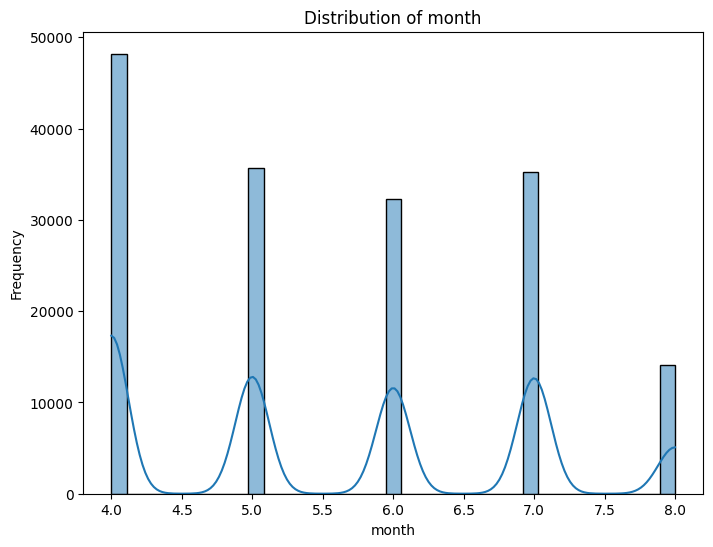

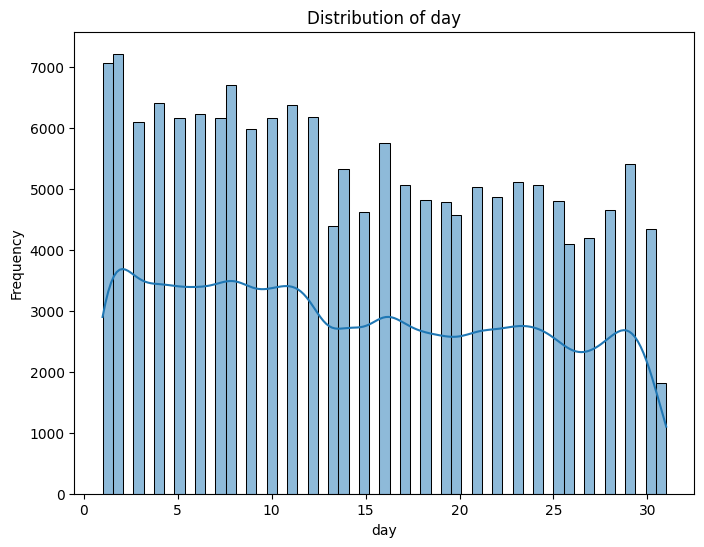

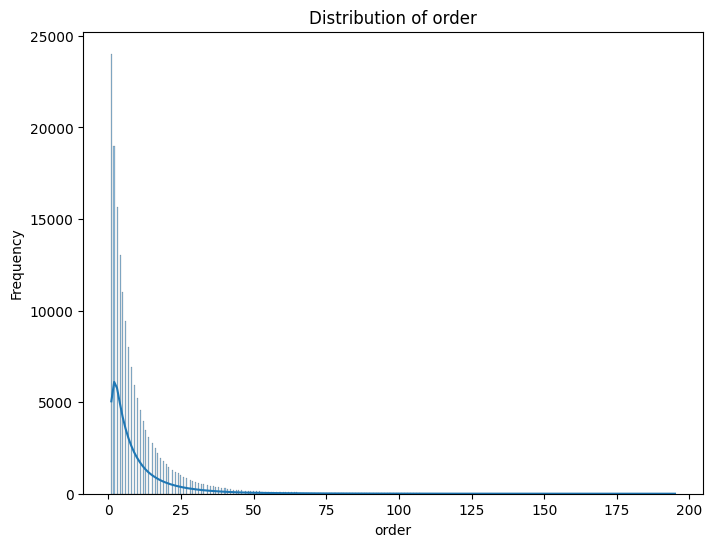

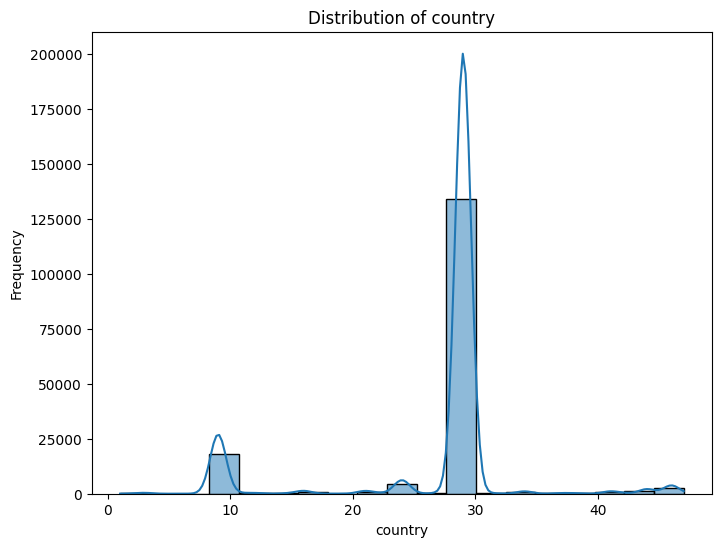

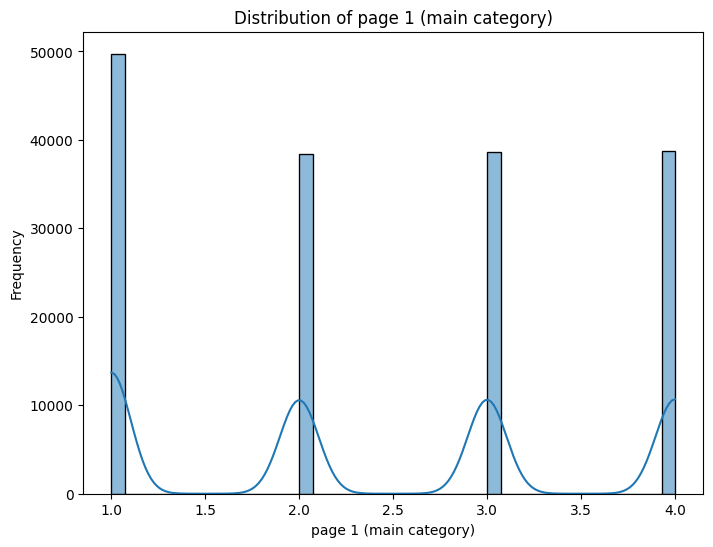

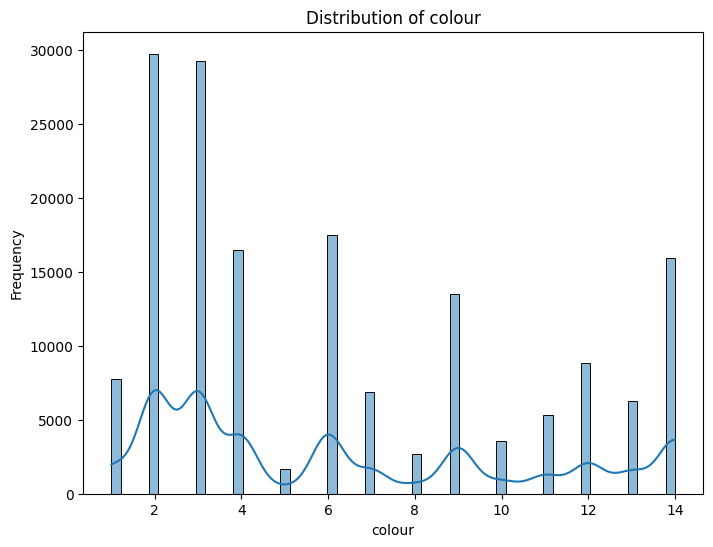

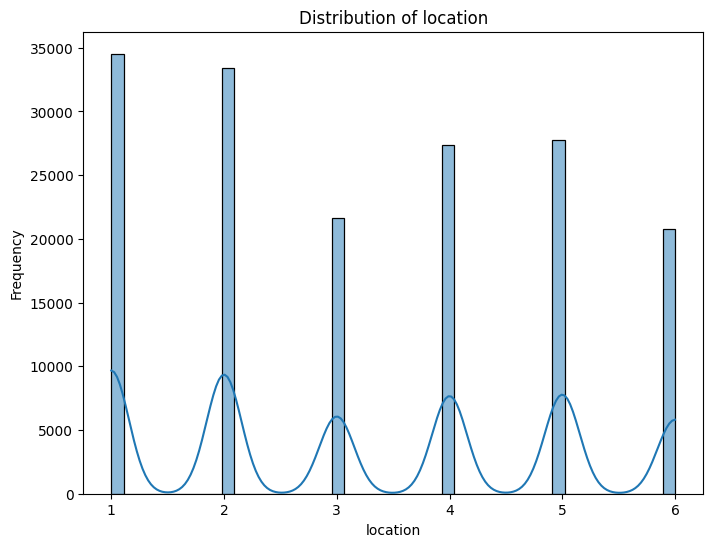

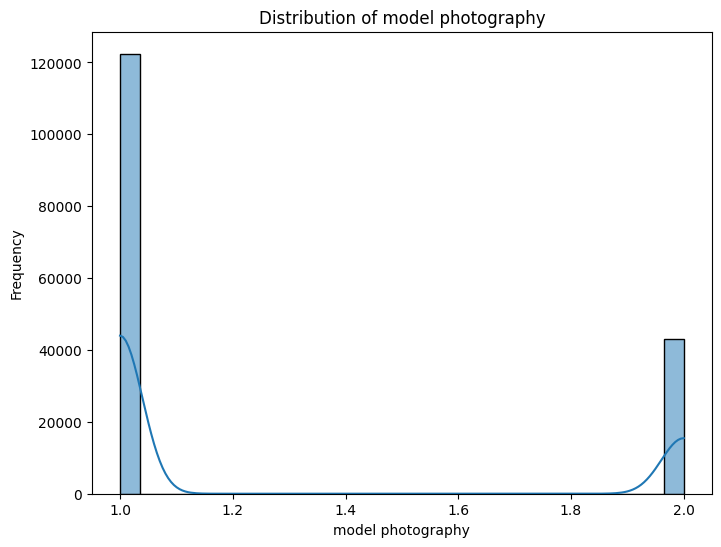

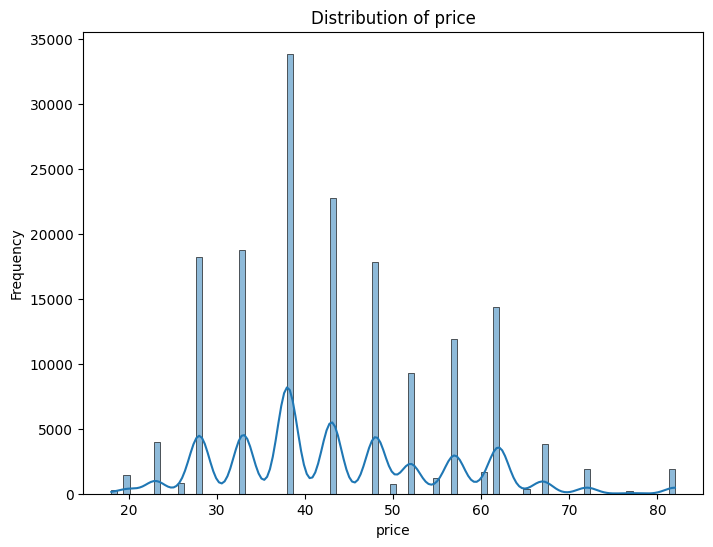

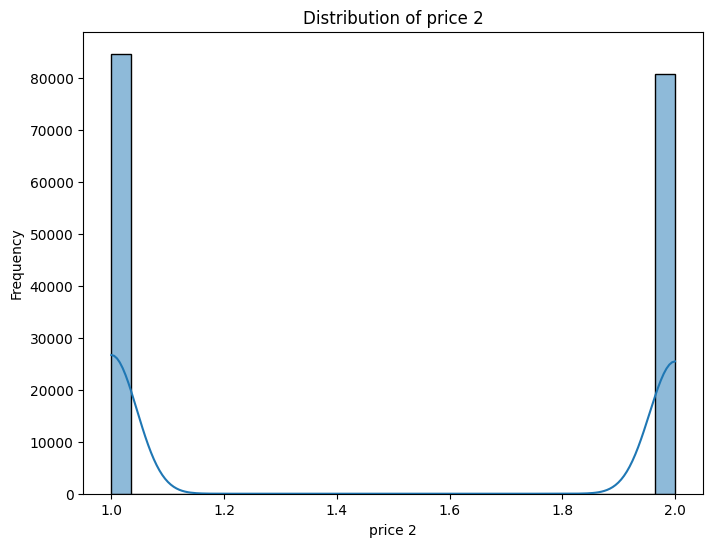

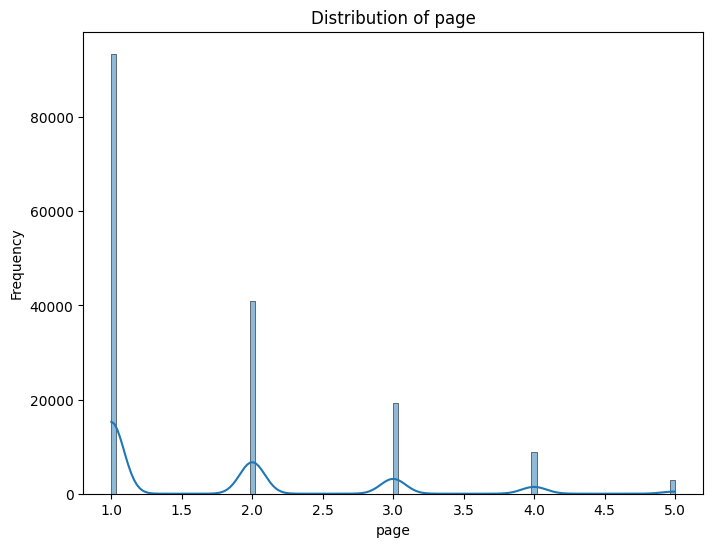

In [12]:
# Visualize distributions of numeric variables
numeric_vars = data.select_dtypes(include=np.number).columns
for var in numeric_vars:
    if var=='year' or var == 'session ID':
        continue;
    plt.figure(figsize=(8, 6))
    sns.histplot(data[var], kde=True)
    plt.title(f"Distribution of {var}")
    plt.xlabel(var)
    plt.ylabel("Frequency")
    plt.show()


## Cleaning

In [13]:
# Data Cleaning
# Drop irrelevant columns
df.drop(['year', 'session ID'], axis=1, inplace=True)
df

month  day  order  country  page 1 (main category)  \
0           4    1      1       29                       1   
1           4    1      2       29                       1   
2           4    1      3       29                       2   
3           4    1      4       29                       2   
4           4    1      5       29                       2   
...       ...  ...    ...      ...                     ...   
165469      8   13      1       29                       2   
165470      8   13      1        9                       1   
165471      8   13      1       34                       1   
165472      8   13      2       34                       3   
165473      8   13      3       34                       2   

       page 2 (clothing model)  colour  location  model photography  price  \
0                          A13       1         5                  1     28   
1                          A16       1         6                  1     33   
2                           B4      10         2                  1     52   
3                          B17       6         6                  2     38   
4                           B8       4         3                  2     52   
...                        ...     ...       ...                ...    ...   
165469                     B10       2         4                  1     67   
165470                     A11       3         4                  1     62   
165471                      A2       3         1                  1     43   
165472                      C2      12         1                  1     43   
165473                      B2       3         1                  2     57   

        price 2  page  
0             2     1  
1             2     1  
2             1     1  
3             2     1  
4             1     1  
...         ...   ...  
165469        1     1  
165470        1     1  
165471        2     1  
165472        1     1  
165473        1     1  

[165474 rows x 12 columns]

## Analyzing w.r.t feature: {order}

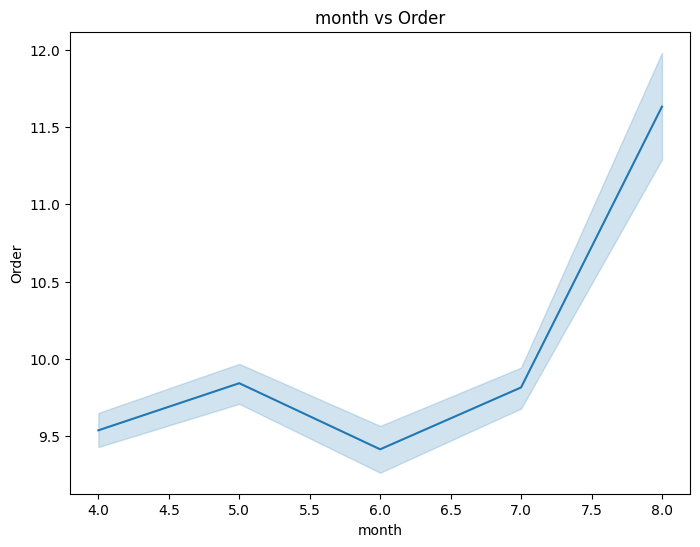

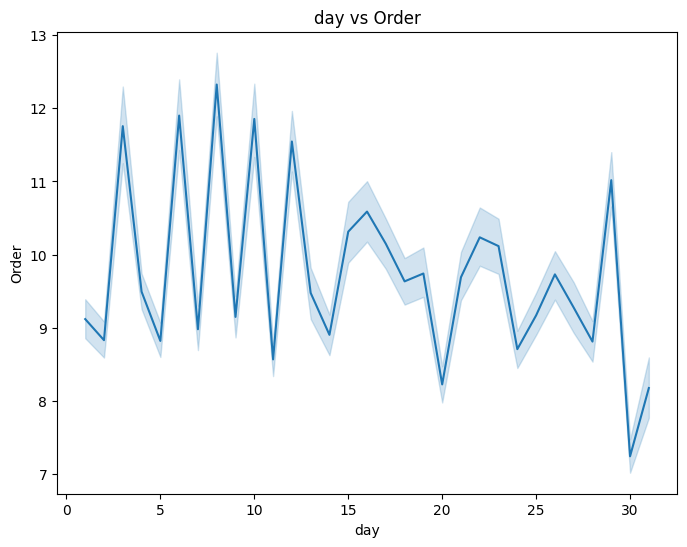

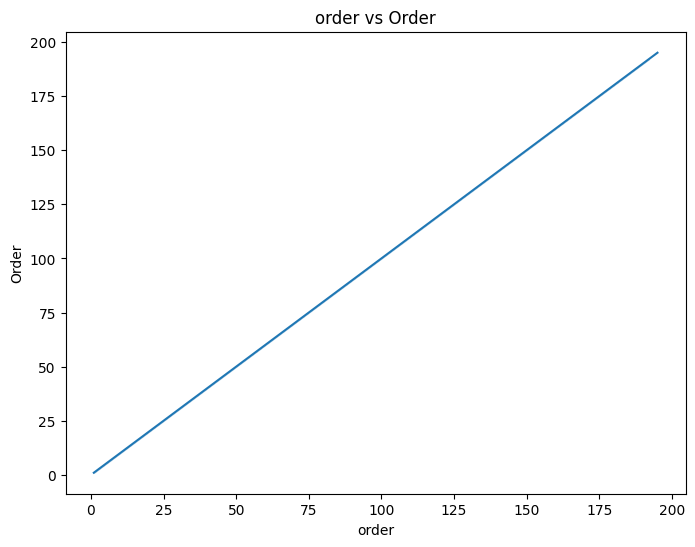

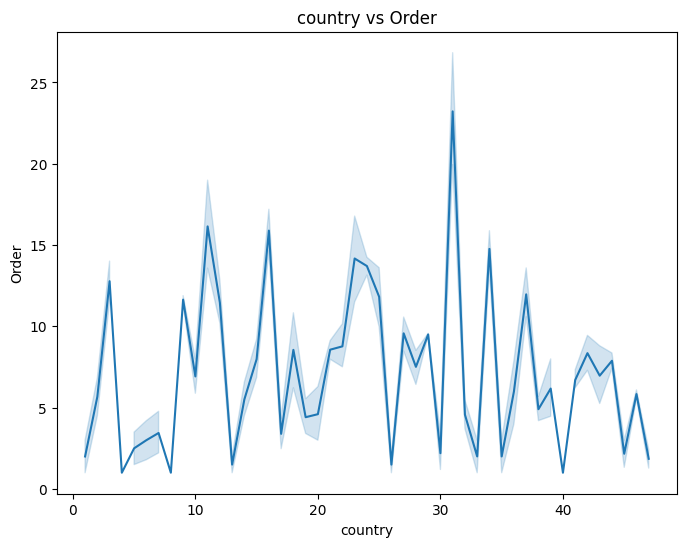

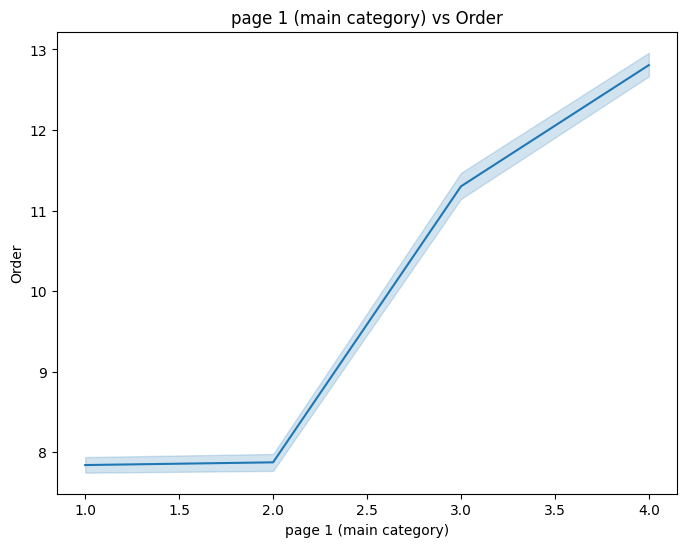

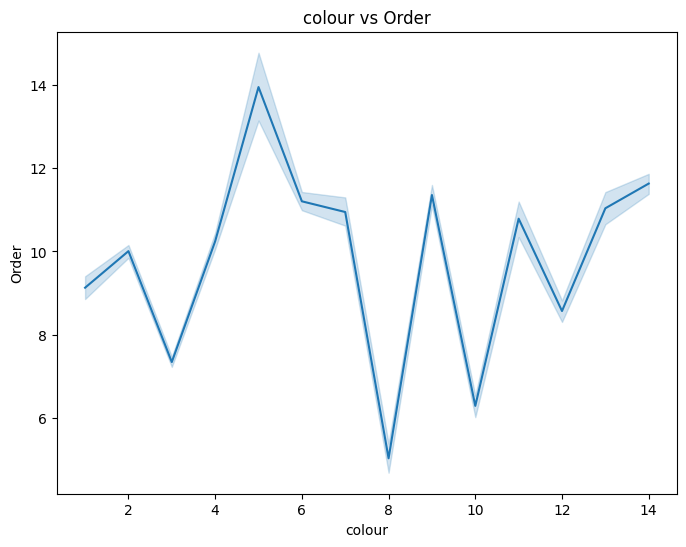

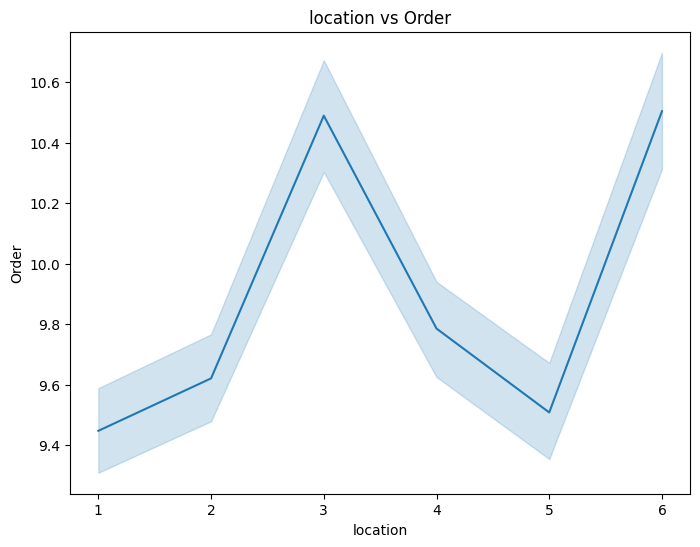

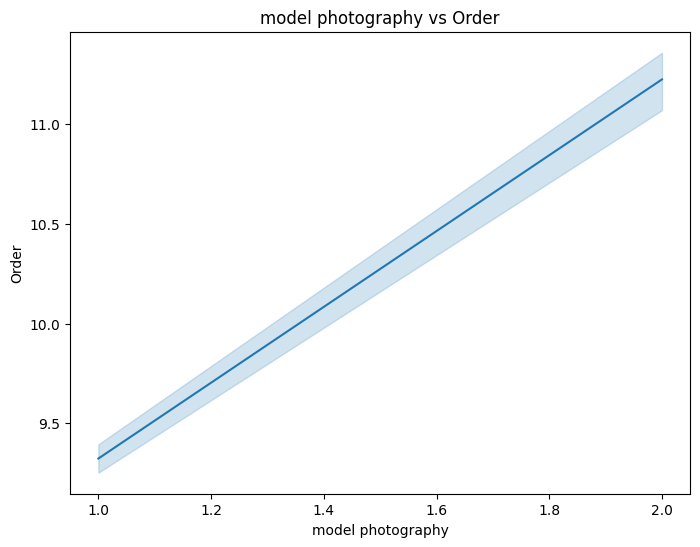

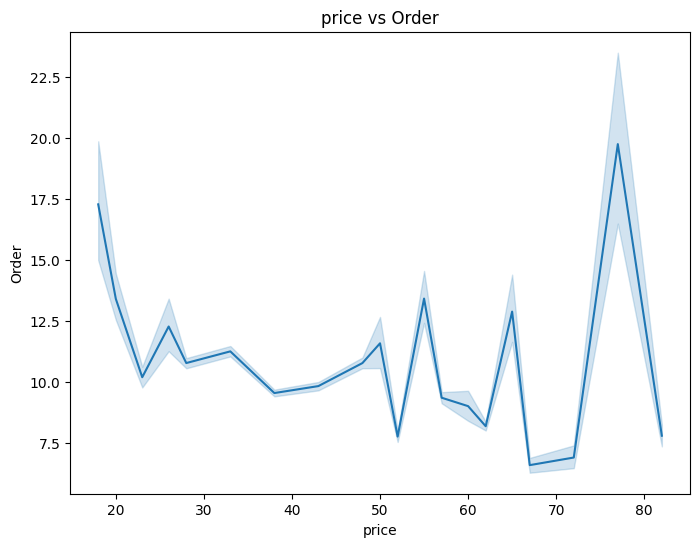

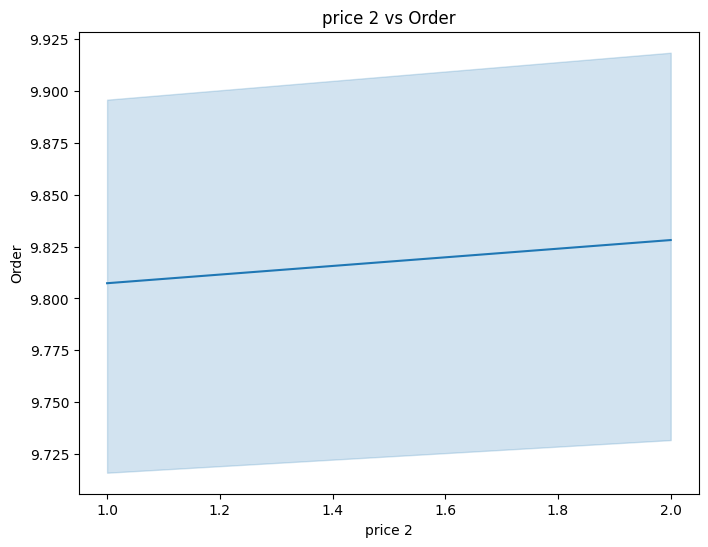

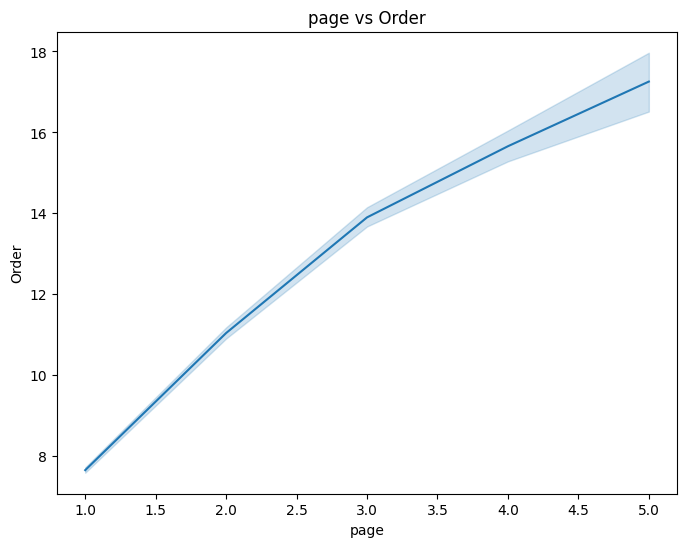

In [14]:
# Bivariate Analysis
numeric_vars = df.select_dtypes(include=np.number).columns
for var in numeric_vars:
    plt.figure(figsize=(8, 6))
    sns.lineplot(x=df[var], y=df['order'])
    plt.title(f"{var} vs Order")
    plt.xlabel(var)
    plt.ylabel("Order")
    plt.show()


## Correlation 

In [15]:
df.corr()

month       day     order   country  \
month                   1.000000 -0.075098  0.026093  0.065502   
day                    -0.075098  1.000000 -0.021744  0.011551   
order                   0.026093 -0.021744  1.000000 -0.064709   
country                 0.065502  0.011551 -0.064709  1.000000   
page 1 (main category)  0.017557 -0.001251  0.151693  0.132817   
colour                 -0.035279  0.005313  0.046427  0.009789   
location               -0.017712  0.000596  0.014854 -0.009072   
model photography       0.011102 -0.000211  0.061820  0.028725   
price                   0.012700 -0.002818 -0.064779 -0.045345   
price 2                -0.014658  0.004254  0.000772 -0.017536   
page                    0.020898  0.011125  0.204106  0.026695   

                        page 1 (main category)    colour  location  \
month                                 0.017557 -0.035279 -0.017712   
day                                  -0.001251  0.005313  0.000596   
order                                 0.151693  0.046427  0.014854   
country                               0.132817  0.009789 -0.009072   
page 1 (main category)                1.000000  0.230577  0.015939   
colour                                0.230577  1.000000  0.042062   
location                              0.015939  0.042062  1.000000   
model photography                     0.213113  0.074755  0.067678   
price                                -0.364791 -0.091159 -0.084653   
price 2                              -0.137944 -0.080147  0.073187   
page                                  0.347992  0.249322 -0.091865   

                        model photography     price   price 2      page  
month                            0.011102  0.012700 -0.014658  0.020898  
day                             -0.000211 -0.002818  0.004254  0.011125  
order                            0.061820 -0.064779  0.000772  0.204106  
country                          0.028725 -0.045345 -0.017536  0.026695  
page 1 (main category)           0.213113 -0.364791 -0.137944  0.347992  
colour                           0.074755 -0.091159 -0.080147  0.249322  
location                         0.067678 -0.084653  0.073187 -0.091865  
model photography                1.000000 -0.212395  0.072944  0.258315  
price                           -0.212395  1.000000 -0.743633 -0.150455  
price 2                          0.072944 -0.743633  1.000000  0.029984  
page                             0.258315 -0.150455  0.029984  1.000000

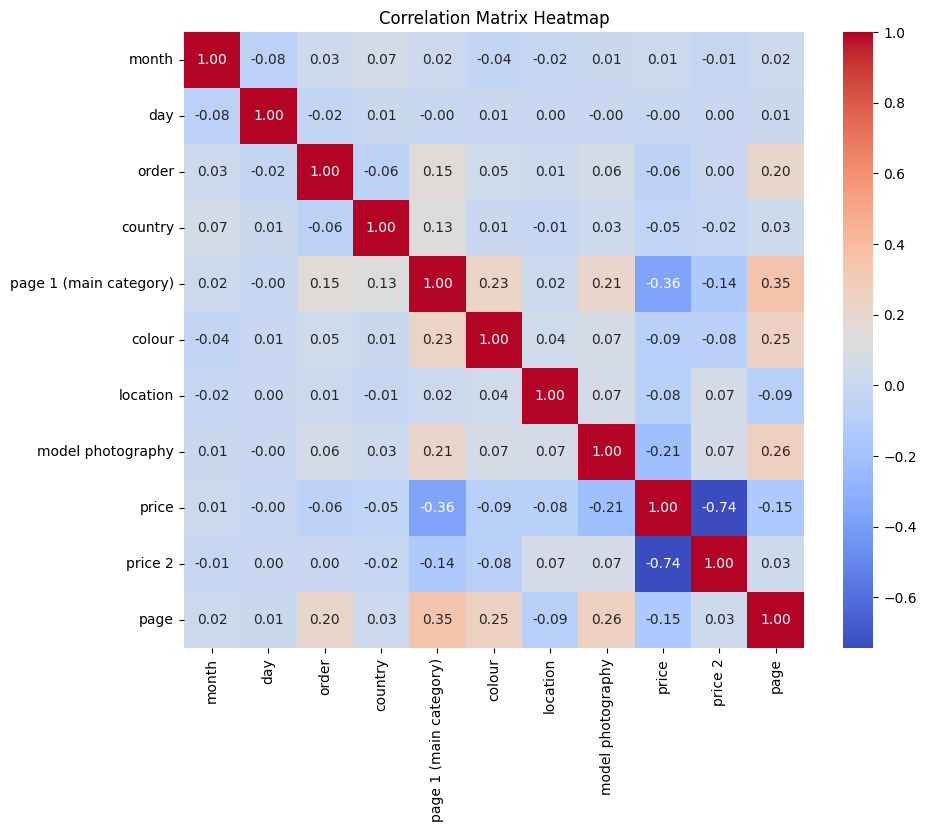

In [16]:
# Correlation matrix heatmap
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

## Answer to the Question: What factors contribute to product popularity?
### Based on these correlations, it seems that factors like the type of product category, pricing strategy, and presentation (model photography) have significant impacts on product popularity, while other factors like location, color, and country might have less direct influence.


## 1. Positive Correlations:
###        Order: There's a moderate positive correlation (0.204) between the order and page, suggesting that as the number of orders increases, the page views also tend to increase.
###        Page 1 (Main Category): It has a moderate positive correlation with several other factors such as order (0.152), country (0.133), and model photography (0.213), indicating that certain main categories tend to attract more orders, views from specific countries, and attention when presented with certain model photography.
###        Model Photography: There's a moderate positive correlation (0.213) between model photography and page 1 (main category), suggesting that certain types of model photography might positively influence the popularity of products.

## 2. Negative Correlations:
###        Price and Price 2: Both price and price 2 have negative correlations with several factors including page 1 (main category), color, and model photography. This suggests that as the price increases, popularity tends to decrease, which is a common trend in consumer behavior.
###        Page 1 (Main Category): It has a negative correlation with price (-0.365) and price 2 (-0.138), indicating that products in certain categories might be less popular if they are priced higher.

## 3. Weak Correlations:
###        Month, Day, Country, Color, Location: These variables show weak correlations with other factors, suggesting they might have minimal direct impact on product popularity.

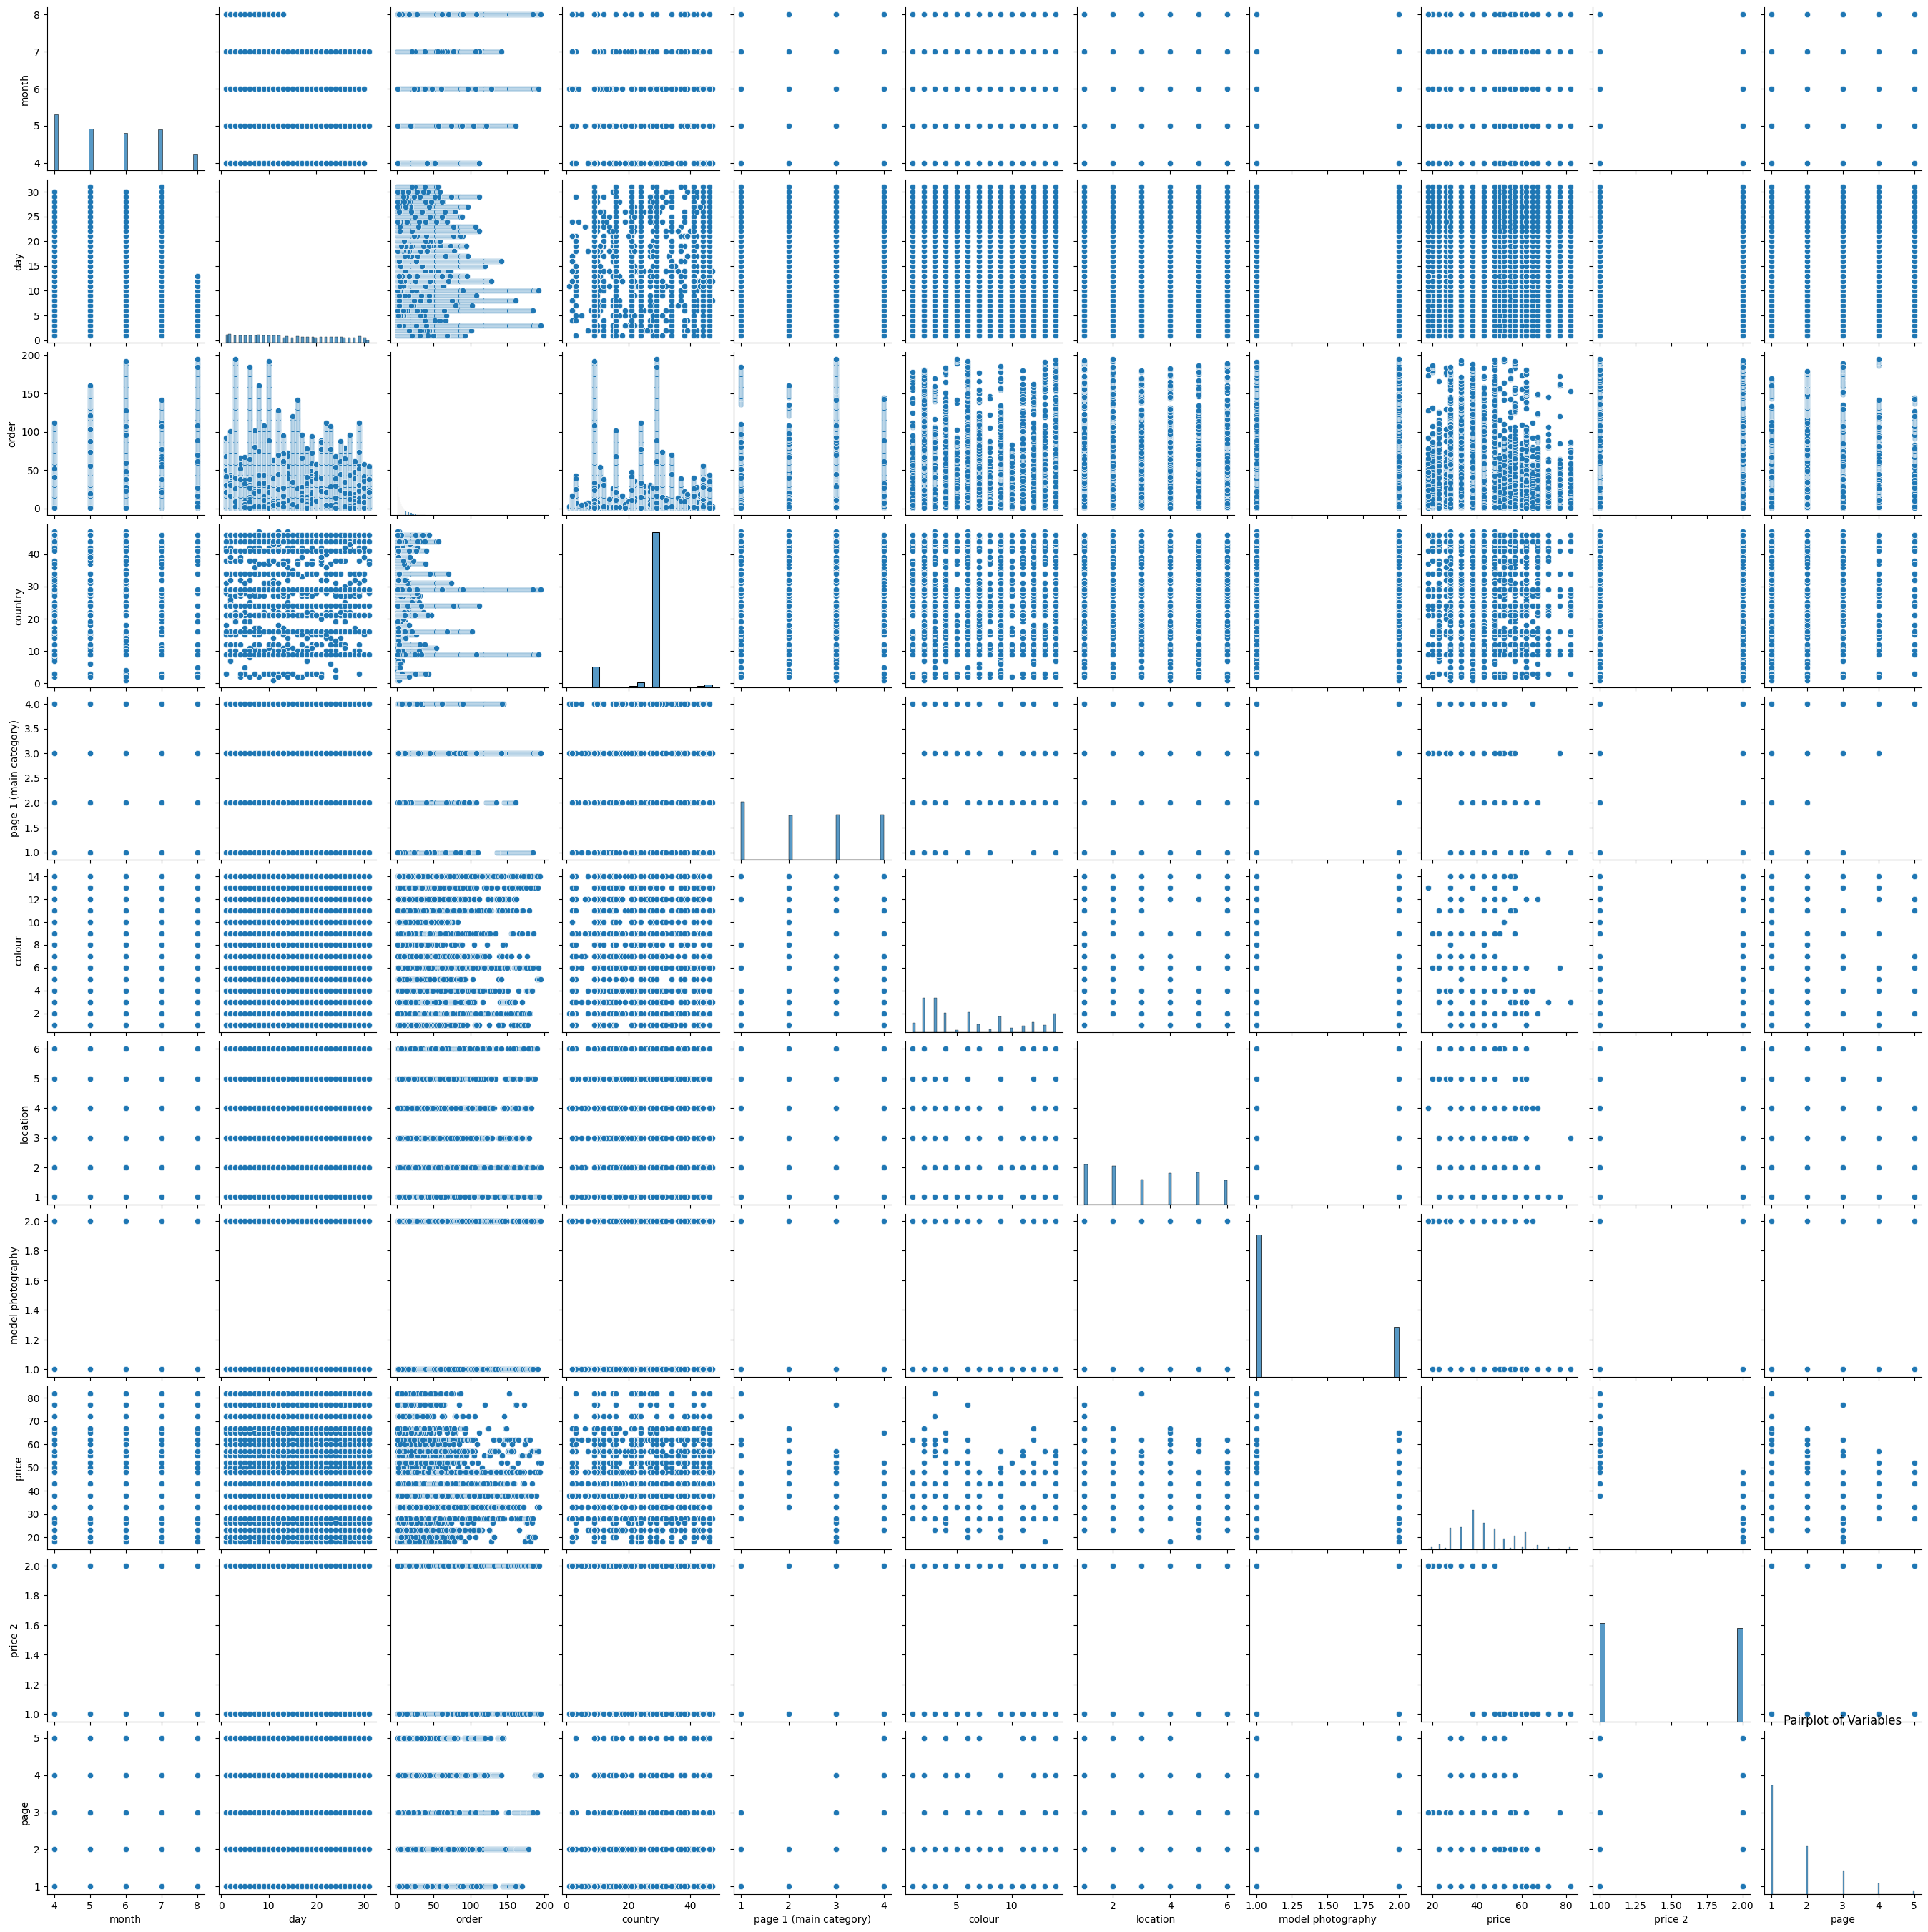

In [17]:
# Multivariate Analysis
# Pairplot
sns.pairplot(data)
plt.title("Pairplot of Variables")
plt.show()


### Maping values to {Month}

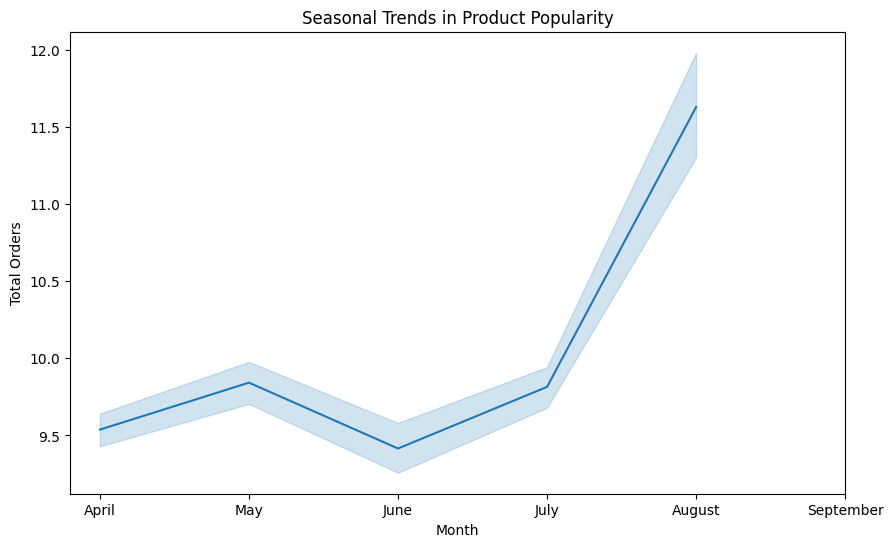

In [18]:
# Aggregate data by month
monthly_data = data.groupby('month').agg({'order': 'sum'}).reset_index()

# Visualize seasonal trends
plt.figure(figsize=(10, 6))
sns.lineplot(x='month', y='order', data=df)
plt.title('Seasonal Trends in Product Popularity')
plt.xlabel('Month')
plt.ylabel('Total Orders')
plt.xticks(range(4, 10), ['April', 'May', 'June', 'July', 'August', 'September' ])
plt.show()


## Average Order per Country

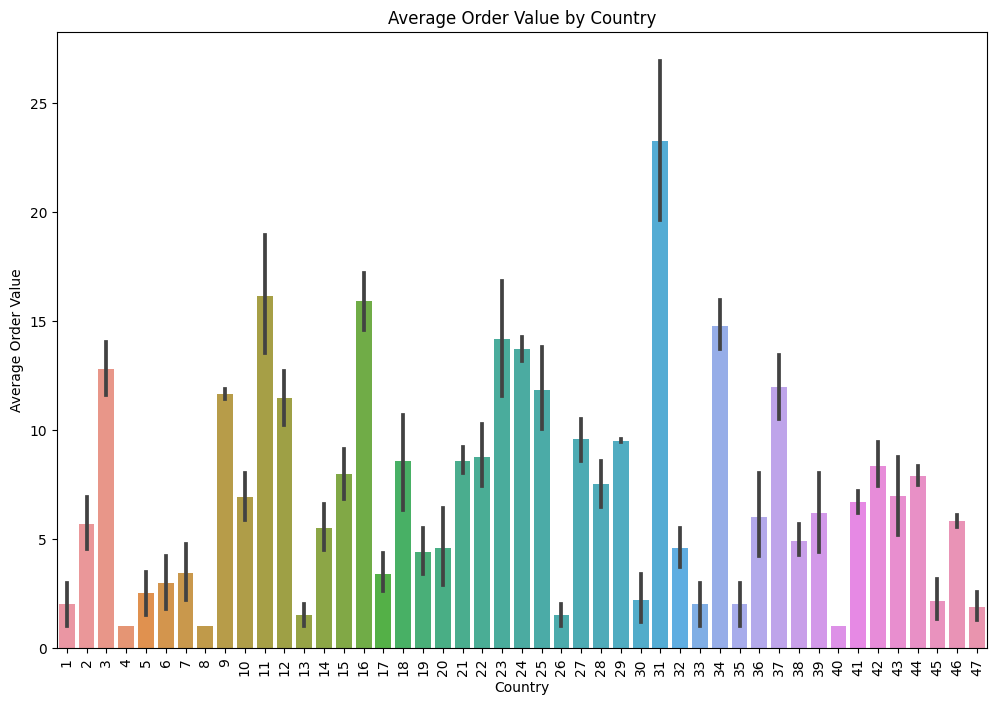

In [19]:
avg_order_value = data.groupby('country').agg({'order': 'mean'}).reset_index()

# Visualize average order value by country
plt.figure(figsize=(12, 8))
sns.barplot(x='country', y='order', data=df)
plt.title('Average Order Value by Country')
plt.xlabel('Country')
plt.ylabel('Average Order Value')
plt.xticks(rotation=90)
plt.show()


In [20]:
# Analyze conversion rates across different pages
conversion_rate_by_page = data.groupby('page').agg({'order': 'mean'}).reset_index()
print("Conversion Rate by Page:\n", conversion_rate_by_page)


Conversion Rate by Page:
    page      order
0     1   7.657043
1     2  11.043912
2     3  13.900990
3     4  15.658165
4     5  17.255402


## Distribution of prices across countries, focusing on those with relatively higher counts of prices.


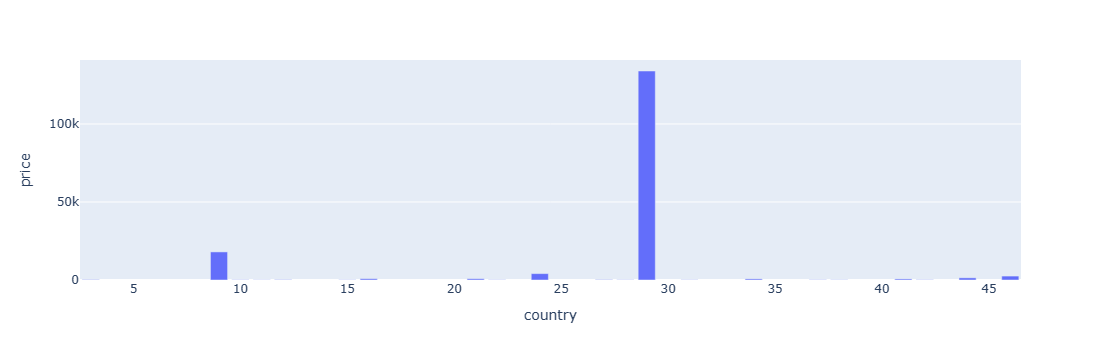

In [21]:
df7 = df.groupby('country')[['price']].count()
df7 = df7.sort_values(['price'], ascending=False)
df7 = df7.query("price > 100")
fig = px.bar(df7, x=df7.index, y='price')
fig.show()


##  The distribution of user engagement (clicks) per order across different countries


In [22]:
df8 = df.groupby('country')[['order']].sum()
df8 = df8.sort_values(['order'], ascending=False)

df9 = df.groupby('country')[['order']].count()
df9 = df9.sort_values(['order'], ascending=False)

df8['avreage_clicks'] = df8/df9
df8 = df8.sort_values(['avreage_clicks'], ascending=False)
df8 = df8.query("avreage_clicks > 3 ")

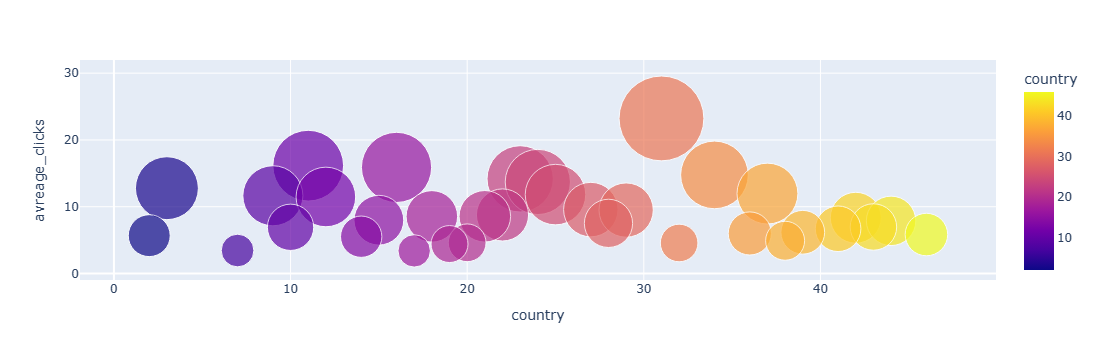

In [23]:
fig = px.scatter(df8, x=df8.index, y="avreage_clicks",
                 size="avreage_clicks", color=df8.index, size_max=60)
fig.show()

###  Comparing the distribution of purchases across different months, with one pie chart showing all months and the other showing all months except August

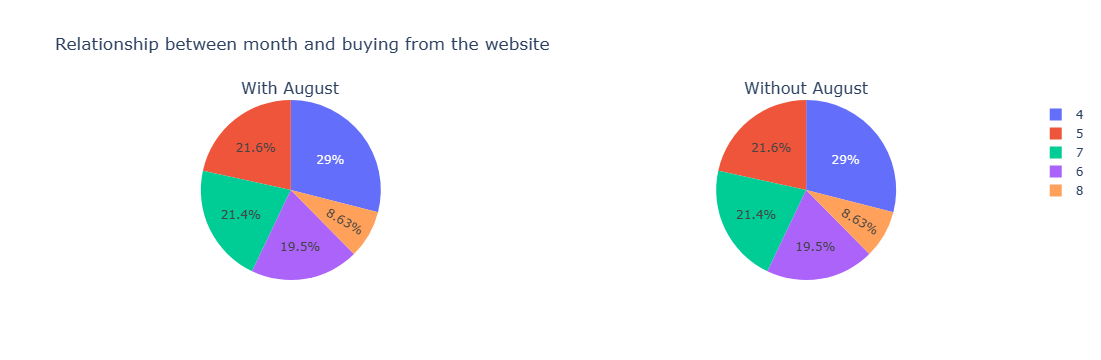

In [24]:
df_1 = df.groupby("month")[["price"]].sum()
df_2 = df[df['month'] != 'August'].groupby("month")[["price"]].sum()
from plotly.subplots import make_subplots
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[
                    [{'type': 'domain'}, {'type': 'domain'}]],subplot_titles = [
                        'With August',
                        'Without August'])

fig.add_trace(go.Pie(labels=df_1.index, values=df_1["price"], name="All monthes"),
              1, 1)
fig.add_trace(go.Pie(labels=df_2.index, values=df_2['price'], name="All months except August"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hoverinfo="label+percent")

fig.update_layout(
    title_text="Relationship between month and buying from the website")




fig.show()

In [25]:
# Convert 'Month' and 'Day' columns to datetime format
df['date'] = pd.to_datetime(df['month'].astype(str) + '-' + df['day'].astype(str), format='%m-%d')
df.drop(['month', 'day'], axis=1, inplace=True)

### Distribution of Prices

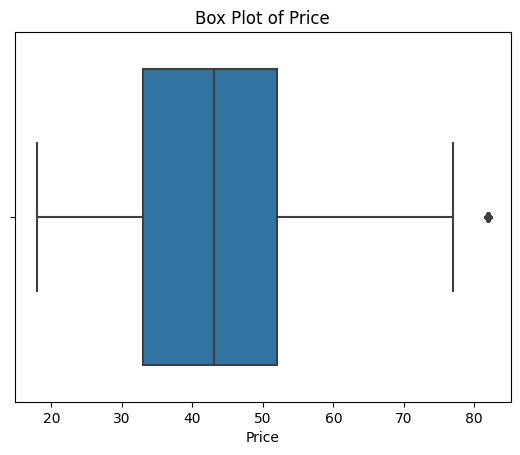

In [26]:
sns.boxplot(x=df['price'])
plt.xlabel('Price')
plt.title('Box Plot of Price')
plt.show()

## Further data preprocessing and visualization 

In [27]:
scaler = StandardScaler()
df[['price']] = scaler.fit_transform(df[['price']])

In [28]:
# Identify numerical and string columns
numerical_cols = df.select_dtypes(include=[np.number]).columns
string_cols = df.select_dtypes(include=[object]).columns

# Fill missing values with mean for numerical columns, excluding 'Price' columns
for col in numerical_cols:
    # if col.startswith('price'):
        # continue
    if col in df.columns:
        df[col].fillna(df[col].mean(), inplace=True)

In [29]:
df.drop_duplicates(inplace=True)
df.shape

(133540, 11)

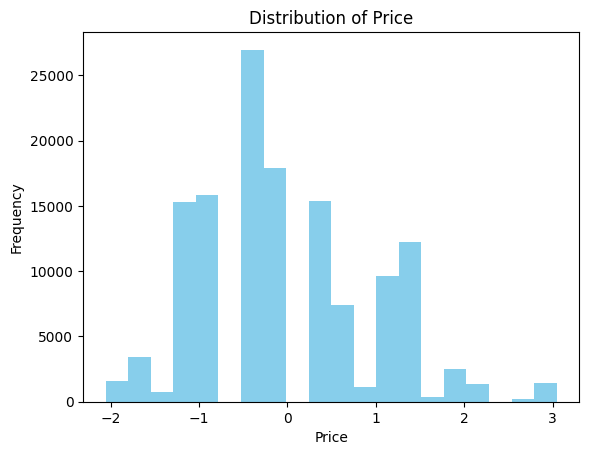

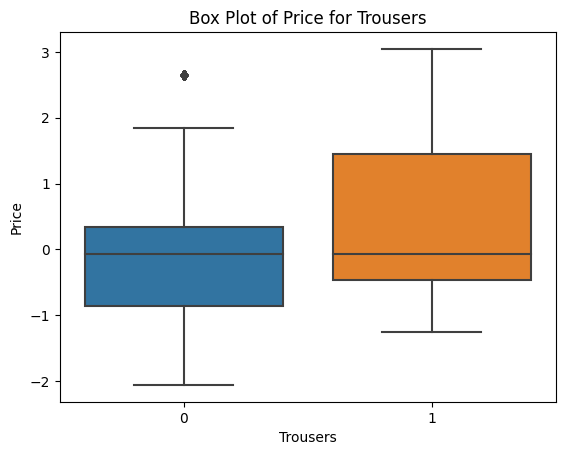

In [30]:
# Feature Engineering
# Encode categorical variables
df = pd.get_dummies(df, columns=['country', 'page 1 (main category)', 'page 2 (clothing model)', 'colour', 'location', 'model photography', 'price 2', 'page'])

# Data Visualization
plt.hist(df['price'], bins=20, color='skyblue')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Price')
plt.show()
print()

sns.boxplot(x='page 1 (main category)_1', y='price', data=df)
plt.xlabel('Trousers')
plt.ylabel('Price')
plt.title('Box Plot of Price for Trousers')
plt.show()

# Prediction

In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# What we will do?

##  We will train two regression models (Random Forest and SVR) to predict the 'order' variable for two different tasks (product popularity and product advertisement) based on the 'price' and 'order' features. Then, it evaluates the performance of these models using MSE.

### Here, I've used a RandomForestRegressor to identify factors contributing to product popularity and an SVR model to determine factors for product advertisement. I trained each model separately on relevant features and evaluated their performance accordingly.

In [32]:

# Select features and target variable for product popularity
X_popularity = df[['price', 'order']]
y_popularity = df['order']

# Split data into train and test sets for product popularity
X_train_popularity, X_test_popularity, y_train_popularity, y_test_popularity = train_test_split(X_popularity, y_popularity, test_size=0.2, random_state=42)

# Train RandomForestRegressor for product popularity
rf_model_popularity = RandomForestRegressor(random_state=42)
rf_model_popularity.fit(X_train_popularity, y_train_popularity)

# Select features and target variable for product advertisement
X_adv = df[['price', 'order']]
y_adv = df['order']

# Split data into train and test sets for product advertisement
X_train_adv, X_test_adv, y_train_adv, y_test_adv = train_test_split(X_adv, y_adv, test_size=0.2, random_state=42)

# Train SVR model for product advertisement
svr_model_adv = SVR(kernel='linear')
svr_model_adv.fit(X_train_adv, y_train_adv)

# Predictions for product popularity
y_pred_popularity = rf_model_popularity.predict(X_test_popularity)

# Predictions for product advertisement
y_pred_adv = svr_model_adv.predict(X_test_adv)

# Evaluate models
mse_popularity = mean_squared_error(y_test_popularity, y_pred_popularity)
mse_adv = mean_squared_error(y_test_adv, y_pred_adv)

print("Mean Squared Error (Product Popularity):", mse_popularity)
print("Mean Squared Error (Product Advertisement):", mse_adv)


Mean Squared Error (Product Popularity): 2.8283660326494683e-05
Mean Squared Error (Product Advertisement): 0.008212872066607087


### Quite Preferable R2 Score

In [33]:
from sklearn.metrics import r2_score

# Calculate R2 score for product popularity model
r2_popularity = r2_score(y_test_popularity, y_pred_popularity)

# Calculate R2 score for product advertisement model
r2_adv = r2_score(y_test_adv, y_pred_adv)

print("R2 Score (Product Popularity):", r2_popularity)
print("R2 Score (Product Advertisement):", r2_adv)


R2 Score (Product Popularity): 0.9999998581984992
R2 Score (Product Advertisement): 0.9999588243681674


# Visualization

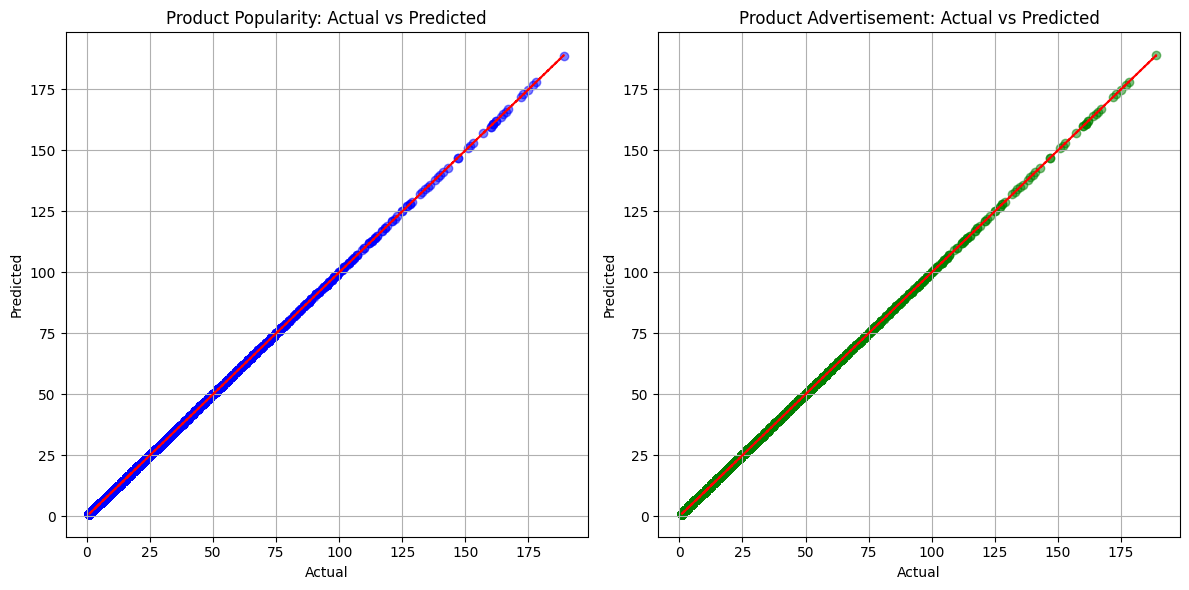

In [34]:
plt.figure(figsize=(12, 6))

# Scatter plot for product popularity
plt.subplot(1, 2, 1)
plt.scatter(y_test_popularity, y_pred_popularity, color='blue', alpha=0.5)
plt.plot(y_test_popularity, y_test_popularity, color='red', linestyle='--')
plt.title('Product Popularity: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(True)

# Scatter plot for product advertisement
plt.subplot(1, 2, 2)
plt.scatter(y_test_adv, y_pred_adv, color='green', alpha=0.5)
plt.plot(y_test_adv, y_test_adv, color='red', linestyle='--')
plt.title('Product Advertisement: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(True)

plt.tight_layout()
plt.show()


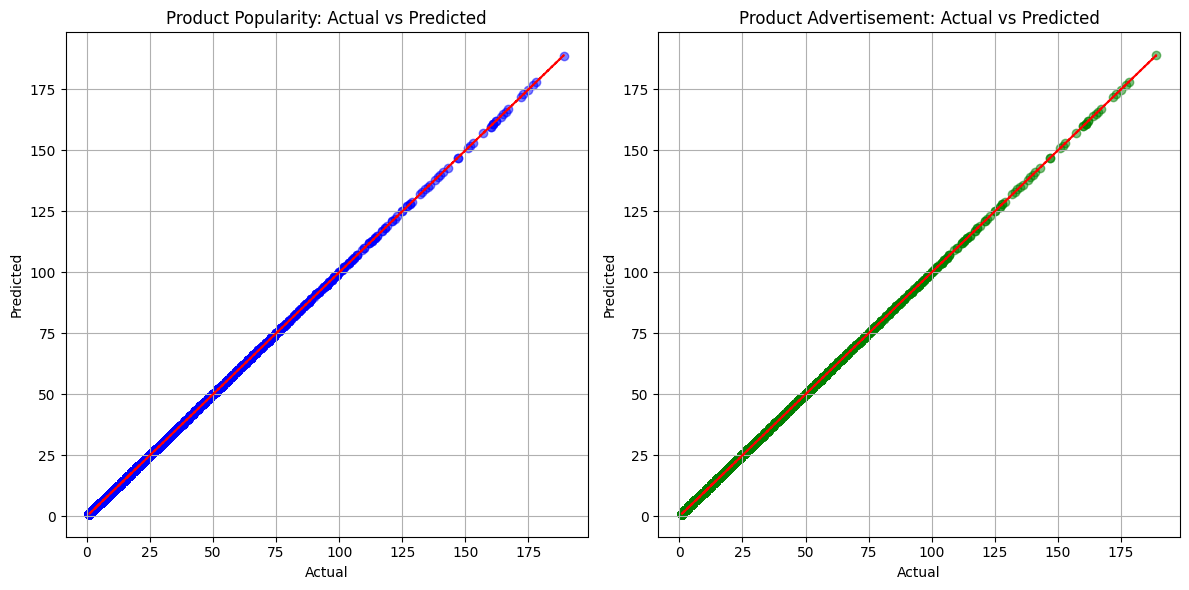

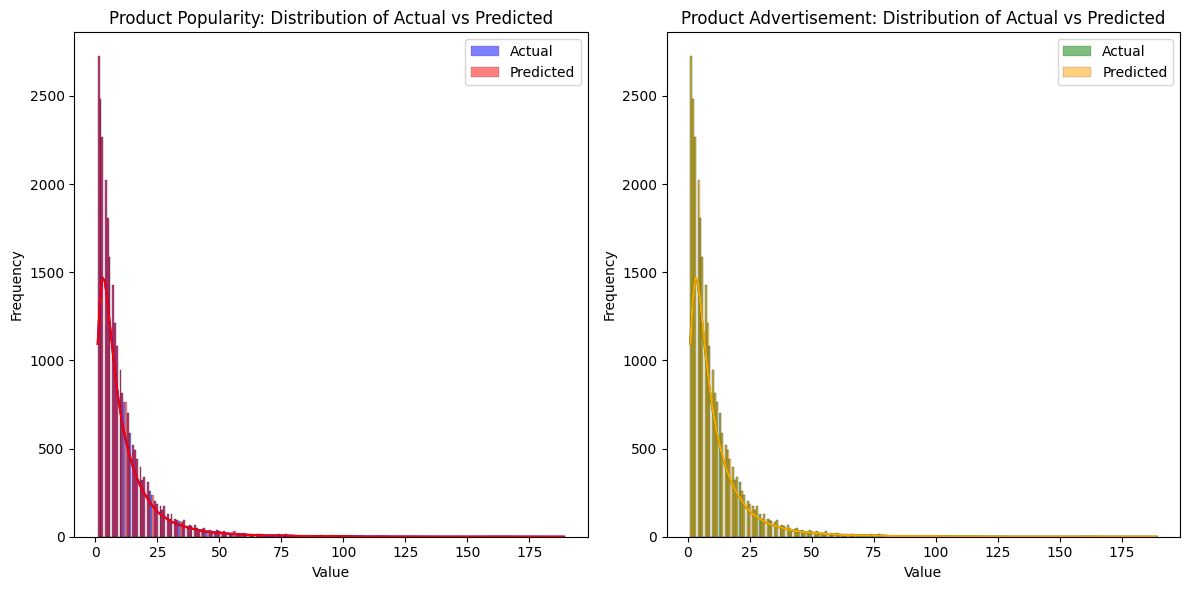

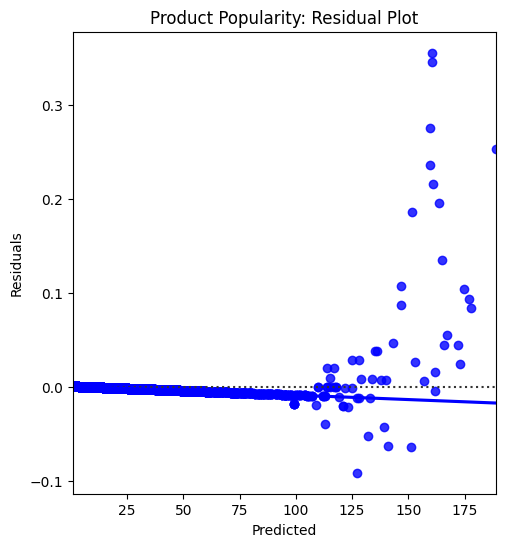

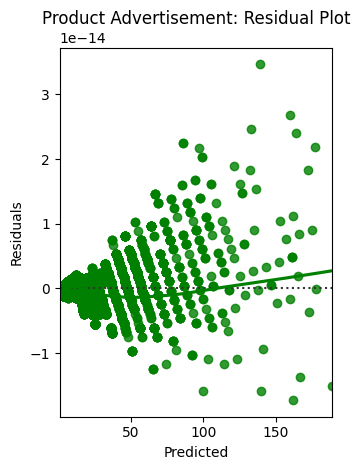

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plots: Actual vs. Predicted
plt.figure(figsize=(12, 6))

# Scatter plot for product popularity
plt.subplot(1, 2, 1)
plt.scatter(y_test_popularity, y_pred_popularity, color='blue', alpha=0.5)
plt.plot(y_test_popularity, y_test_popularity, color='red', linestyle='--')
plt.title('Product Popularity: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(True)

# Scatter plot for product advertisement
plt.subplot(1, 2, 2)
plt.scatter(y_test_adv, y_pred_adv, color='green', alpha=0.5)
plt.plot(y_test_adv, y_test_adv, color='red', linestyle='--')
plt.title('Product Advertisement: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(True)

plt.tight_layout()
plt.show()

# Distribution plots: Actual and Predicted
plt.figure(figsize=(12, 6))

# Distribution plot for product popularity
plt.subplot(1, 2, 1)
sns.histplot(y_test_popularity, color='blue', label='Actual', kde=True)
sns.histplot(y_pred_popularity, color='red', label='Predicted', kde=True)
plt.title('Product Popularity: Distribution of Actual vs Predicted')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

# Distribution plot for product advertisement
plt.subplot(1, 2, 2)
sns.histplot(y_test_adv, color='green', label='Actual', kde=True)
sns.histplot(y_pred_adv, color='orange', label='Predicted', kde=True)
plt.title('Product Advertisement: Distribution of Actual vs Predicted')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

# Residual plots
plt.figure(figsize=(12, 6))

residuals = y_test_popularity - y_pred_popularity

# Residual plot for product popularity
plt.subplot(1, 2, 1)
sns.residplot(x=y_pred_popularity, y=residuals, color='blue', lowess=True)
plt.title('Product Popularity: Residual Plot')
plt.xlabel('Predicted')
plt.ylabel('Residuals')

plt.show()
residuals1 = y_test_adv - y_pred_adv
# Residual plot for product advertisement
plt.subplot(1, 2, 2)
sns.residplot(x=y_pred_adv, y=residuals1, color='green', lowess=True)
plt.title('Product Advertisement: Residual Plot')
plt.xlabel('Predicted')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()


# Question: What factors should a seller consider to advertise a product?

### Since black, blue, and grey are the colors that sell the best, the seller ought to keep more of these colors in stock.
### Since there are more sales in the first week of the month, the seller needs to have a good stock at this time.
### In order to get customers to notice new products, the seller must arrange them top to bottom and popular products on the bottom row.
### The seller should use model photography where the model is facing forward, instead of in profile
### The vendor ought to pay attention to cultural differences and create goods specifically for high-demand nations like Poland, the Czech Republic, and Lithuania. Offering discounts can draw in more clients in average sales nations like Germany and Ireland.
### To guarantee that users notice new products, the seller should list them on the first page.

# Thank You